### Student Information
Name: Teepawin Mueanpetch

Student ID: 112006229

GitHub ID: https://github.com/Teepawin

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import seaborn as sns
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh

#Get the newdataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

#Exercise 1
for i in range(3):
    print(f"Example {i+1}")
    print("\n".join(df.text[i].split("\n")))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.


In [2]:
#Exercise 2
df.get(["text","label"])

#Check size and head
#print(df.shape)
#print(df.head())

#Drop some column that is not significant to our target
feature_deletion = ["datetime","post_id","url","author"]

df = df.drop(feature_deletion,axis=1)

#Exercise 3
df[df["sentiment"]==1.0][::10][0:5]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
25,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,4,NaN,NaN,"You see, Target, pissing off a good chunk of y...",0.758333,0.233333,1.0,"['customer', 'base', 'chunk', 'Target', 'idea']",-1.0
56,comment,stocks,BREAKING: China raises tariffs on U.S. goods t...,-1,NaN,NaN,"To be fair, Chinese exports to the US make up ...",0.466667,0.233333,1.0,"['portion', 'degree', 'US', 'kinda', '’', 'way...",0.0
73,comment,stocks,Is the market in complete denial right now?,1,NaN,NaN,"Look, the USA somehow thought a second term f...",0.460000,0.040000,1.0,"['USA', 'fool', 'Look', 'Trump', 'world', 'cul...",-1.0
96,comment,wallstreetbets,Someone post the hotline please.,1,NaN,NaN,200k loss in a month.. haha,0.300000,0.200000,1.0,"['..', 'month', 'loss', 'haha']",-1.0


                                 type                           subreddit  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                title                             upvotes  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            downvotes                        upvote_ratio  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                 783                                 783   

                                 text                        subjectivity  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             polarity                           sentimen

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment_label'>

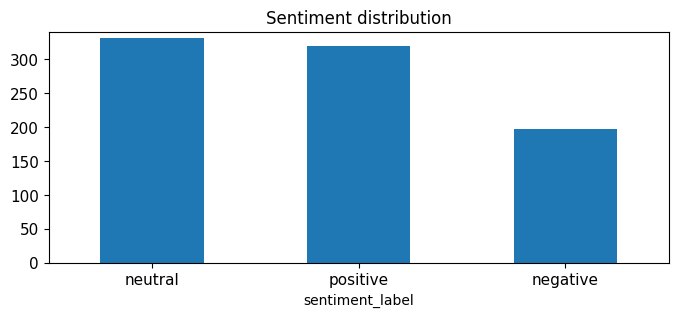

In [3]:
#Create new column for classification (postive neutral negative)
def format_labels(target):
    if target==1.0:
        return "positive"
    elif target==0:
        return "neutral"
    elif target==-1.0:
        return "negative"        

df['sentiment_label'] = df.sentiment.apply(format_labels)

#Exercise 4
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

#Drop row that have null value
df_dropna = df.dropna()

#Exercise 6 & 7
#Plot Semtiment label distrubution
df.sentiment_label.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, df.sentiment.value_counts().max()+10],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_label'>

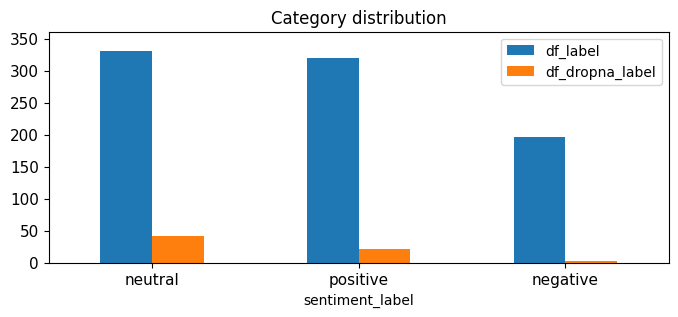

In [4]:
#Exercise 8
df_compare = pd.DataFrame({
    'df_label': df.sentiment_label.value_counts(),
    'df_dropna_label': df_dropna.sentiment_label.value_counts()
})

df_compare.plot(kind = 'bar',
                title = 'Category distribution',
                ylim = [0, df.sentiment_label.value_counts().max()+30],        
                rot = 0, fontsize = 11, figsize = (8,3))

In [5]:
#text tokenizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix

#Exercise 9
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

000
100
125
17th


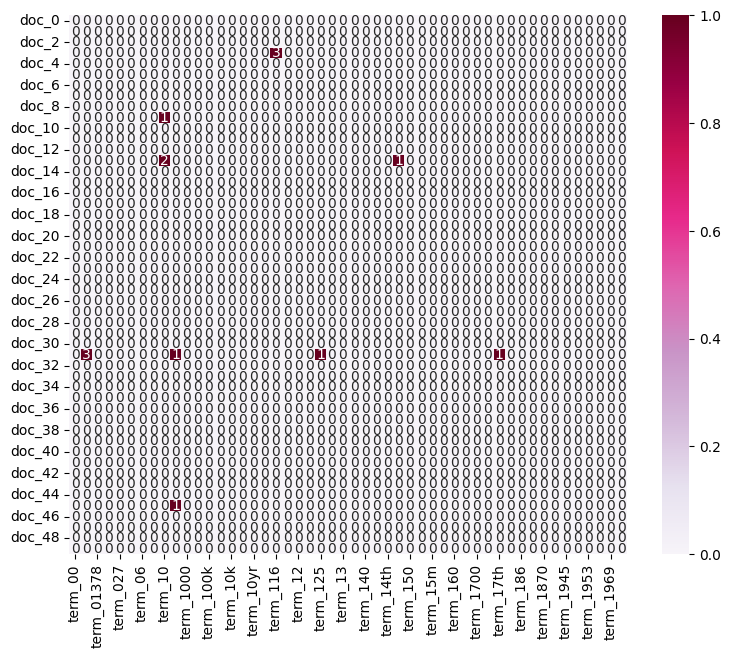

In [6]:
#text tokenizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
#print(df_counts[0])
#print(df_counts.shape)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

plot_y = ["doc_"+ str(i) for i in list(df.index)[0:50]]

plot_z = df_counts[0:50, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


#Exercise 10 search for doc_31
nonzero_cols = np.where(df_counts[31,0:50].toarray()>=1)[1]

for i in nonzero_cols:
    print(count_vect.get_feature_names_out()[i])

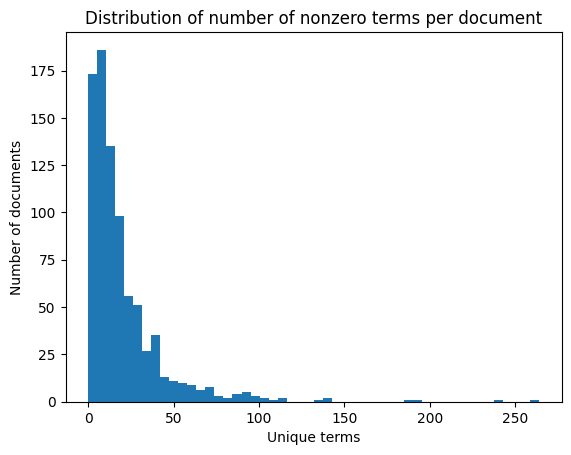

In [7]:
#Exercise 11
df_density = (df_counts > 0).sum(axis=1).A1  # nonzeros per doc
plt.hist(df_density, bins=50)
plt.title("Distribution of number of nonzero terms per document")
plt.xlabel("Unique terms")
plt.ylabel("Number of documents")
plt.show()

In [8]:
#Exercise 12
# Answer here
import plotly.express as px

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 300 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)

fig.show()

In [9]:
#Exercise 13
# Set min freq.
min_freq = 10
mask = term_frequencies >= min_freq


# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[mask],
    y=term_frequencies[mask],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 10 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)

In [10]:
#Exercise 14
#Selecting top 100 frequencies
N = 100
top_indices = np.argsort(term_frequencies)[::-1][:N]   

# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[top_indices],
    y=term_frequencies[top_indices],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 300 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)

In [11]:
#Exercise 15
term_frequencies_log = [math.log(i) for i in term_frequencies]
#Selecting top 100 frequencies
N = 100
top_indices_log = np.argsort(term_frequencies_log)[::-1][:N]   
term_frequencies_log_temp = np.array(term_frequencies_log)
# Create interactive bar plot
fig = px.bar(
    x=count_vect.get_feature_names_out()[top_indices_log],
    y=term_frequencies_log_temp[top_indices_log],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title="Top 300 Term Frequencies",
)

# Rotate x-axis labels for readability
fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,  # make wide
    height=600
)


# Phase 2

In [12]:
### Begin Assignment Here

#Exercise 16
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#Finding frequent patterns

categories = df['sentiment_label'].unique()  
category_dfs = {} 

for category in categories:
    category_dfs[category] = df[df['sentiment_label'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  
    X_counts = count_vect.fit_transform(df['text'])  
    
    words = count_vect.get_feature_names_out()
    
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {} 

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number=0
print(f"Filtered Term-Document Frequency DataFrame for sentiment {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for sentiment negative:


,01378,027,10,100,100k,100x,11,12,125,13,...,yields,yikes,yippee,yo,you,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
category_number=0 

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}

for category in categories:
    print(f'\nFor sentiment {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")




For sentiment negative we filter the following words:
Bottom 1.0% words: 
wit           1
writing       1
17th          1
ws            1
wsb           1
xeqt          1
1700          1
ya            1
2011          1
2s            1
11            1
125           1
13            1
140           1
portfolios    1
poses         1
dtype: int64
Top 5.0% words: 
too          9
make         9
some         9
want         9
economy      9
          ... 
it          99
is         113
and        121
to         144
the        236
Length: 81, dtype: int64

For sentiment positive we filter the following words:
Bottom 1.0% words: 
10ks            1
125             1
zsil            1
1961            1
1953            1
1947            1
1945            1
outperformed    1
186             1
outlandish      1
17th            1
1728            1
160             1
15m             1
150             1
145             1
zone            1
208             1
wrote           1
passion         1
passed        

In [14]:
from PAMI.extras.convert.DF2DB import DF2DB            

import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    #Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    #Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)



===== Analyzing SUBREDDIT: POSITIVE (td_freq_db_positive.csv) =====
Database size (total no of transactions) : 317
Number of items : 2940
Minimum Transaction Size : 1
Average Transaction Size : 16.681388012618296
Maximum Transaction Size : 197
Standard Deviation Transaction Size : 22.259781119469036
Variance in Transaction Sizes : 497.0658866749191
Sparsity : 0.9943260584991094


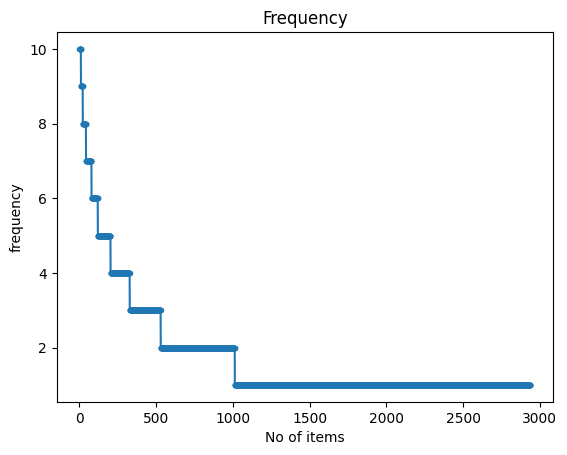

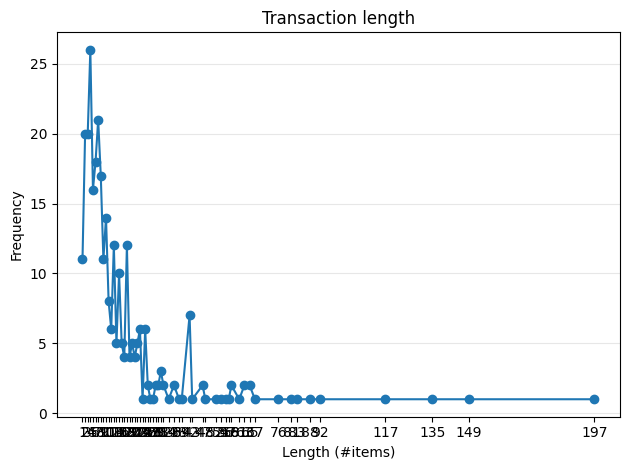


===== Analyzing SUBREDDIT: NEGATIVE (td_freq_db_negative.csv) =====
Database size (total no of transactions) : 196
Number of items : 1534
Minimum Transaction Size : 1
Average Transaction Size : 12.918367346938776
Maximum Transaction Size : 66
Standard Deviation Transaction Size : 10.813987040023255
Variance in Transaction Sizes : 117.54201988487702
Sparsity : 0.9915786392783972


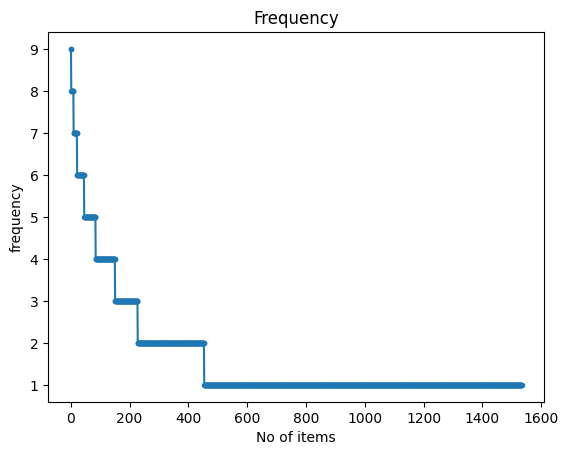

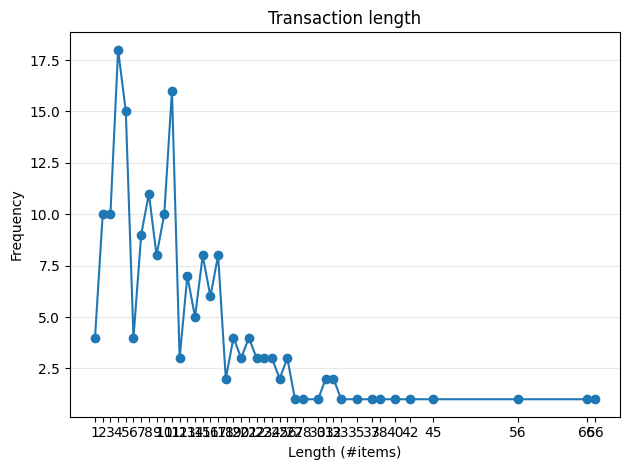


===== Analyzing SUBREDDIT: NEUTRAL (td_freq_db_neutral.csv) =====
Database size (total no of transactions) : 326
Number of items : 1192
Minimum Transaction Size : 1
Average Transaction Size : 5.911042944785276
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.761302421896447
Variance in Transaction Sizes : 22.739754601226995
Sparsity : 0.9950410713550459


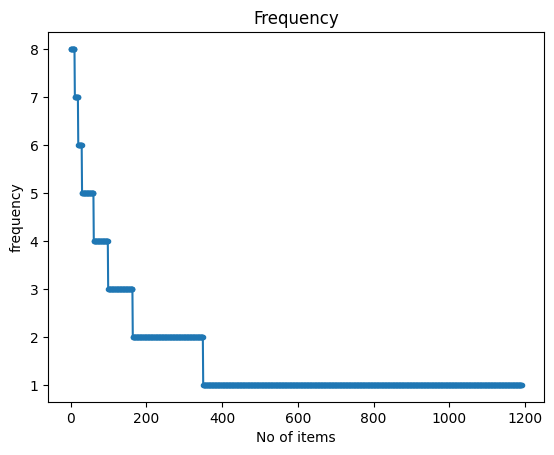

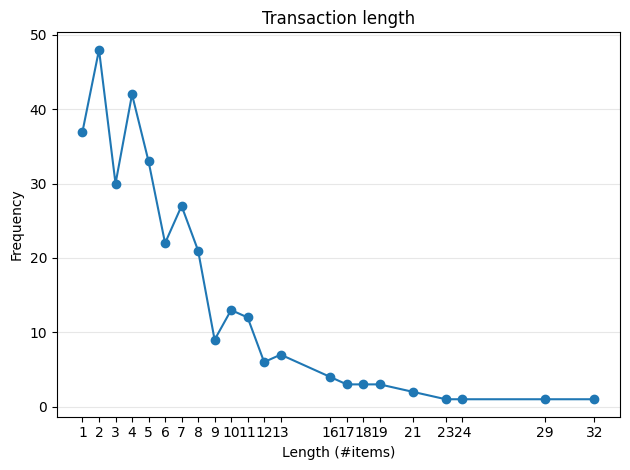

In [15]:
from PAMI.extras.dbStats import TransactionalDatabase as tds


files = [
    ("positive",        "td_freq_db_positive.csv"),
    ("negative",           "td_freq_db_negative.csv"),
    ("neutral",      "td_freq_db_neutral.csv"),
]


for label, filename in files:
    print(f"\n===== Analyzing SUBREDDIT: {label.upper()} ({filename}) =====")
    
    # Load the transactional database for this subreddit
    obj = tds.TransactionalDatabase(filename)
    obj.run()
    
    # Print dataset statistics
    obj.printStats()
    
    # Plot graphs for visual analysis
    obj.plotGraphs()

In [16]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)  
obj1.mine()

frequentPatternsDF_reddit_stock_positive = obj1.getPatternsAsDataFrame()

print('Total No of patterns:', len(frequentPatternsDF_reddit_stock_positive))  # total number of patterns
print('Runtime:', obj1.getRuntime())  # measure runtime

obj1.save('freq_patterns_reddit_stock_positive_minSup9.txt')
frequentPatternsDF_reddit_stock_positive

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 22
Runtime: 0.002107858657836914


,Patterns,Support
0,already,9
1,american,9
2,gold,9
3,which,9
4,point,9
5,doesn,9
6,lmao,9
7,love,9
8,still,9
9,after,9


In [17]:
obj2 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)  
obj2.mine()

frequentPatternsDF_reddit_stock_negative = obj2.getPatternsAsDataFrame()
obj2.save('freq_patterns_reddit_stock_negative_minSup9.txt')

obj3 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)  
obj3.mine()

frequentPatternsDF_reddit_stock_neutral = obj3.getPatternsAsDataFrame()
obj3.save('freq_patterns_reddit_stock_negative_minSup9.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [18]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_reddit_stock_positive, frequentPatternsDF_reddit_stock_negative, frequentPatternsDF_reddit_stock_neutral]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df1 in dfs:
    for pattern in df1['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df1) for df1 in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df1 in dfs:
    filtered_df = df1[df1['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns Support
12   looking      10
21    always      10
20  everyone      10
19    thanks      10
18   america      10
17     today      10
16     where      10
15   someone      10
14   country      10
13    pretty      10
1   american       9
22      time       9
0    already       9
11     great       9
10      call       9
9      after       9
8      still       9
7       love       9
6       lmao       9
5      doesn       9
4      point       9
3      which       9
2       gold       9
23       our       9
Number of patterns discarded: 0


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
print(df.columns)
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

Index(['type', 'subreddit', 'title', 'upvotes', 'downvotes', 'upvote_ratio',
       'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label',
       'sentiment_label'],
      dtype='object')


,00,000,01378,02,027,03,06,08,10,100,...,call,after,still,love,lmao,doesn,point,which,gold,our
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Exercise 17
import pandas as pd
from PAMI.frequentPattern.topk import FAE as alg

category_number = 0  
df_category = filt_term_document_dfs[categories[category_number]]

df_category.to_csv('td_freq_db_label.csv', sep='\t', index=False, header=False)

minimumSupportCountList = [100, 150, 200]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

algorithm = 'FAE'
for minSupCount in minimumSupportCountList:
    obj = alg.FAE(iFile='td_freq_db_label.csv', k=minSupCount, sep='\t')
    obj.mine()
    result.loc[result.shape[0]] = [
        algorithm,
        minSupCount,
        len(obj.getPatterns()),
        obj.getRuntime(),
        obj.getMemoryRSS()
    ]

print(result)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
  algorithm  minSup  patterns   runtime     memory
0       FAE     100       100  0.089769  439984128
1       FAE     150       150  0.066474  440086528
2       FAE     200       160  0.059908  440930304


In [ ]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg 
import pandas as pd

inputFile = 'td_freq_db_label.csv'
seperator='\t'
minimumSupportCountList = [3,6]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

print(result)

Empty DataFrame
Columns: [algorithm, minSup, patterns, runtime, memory]
Index: []


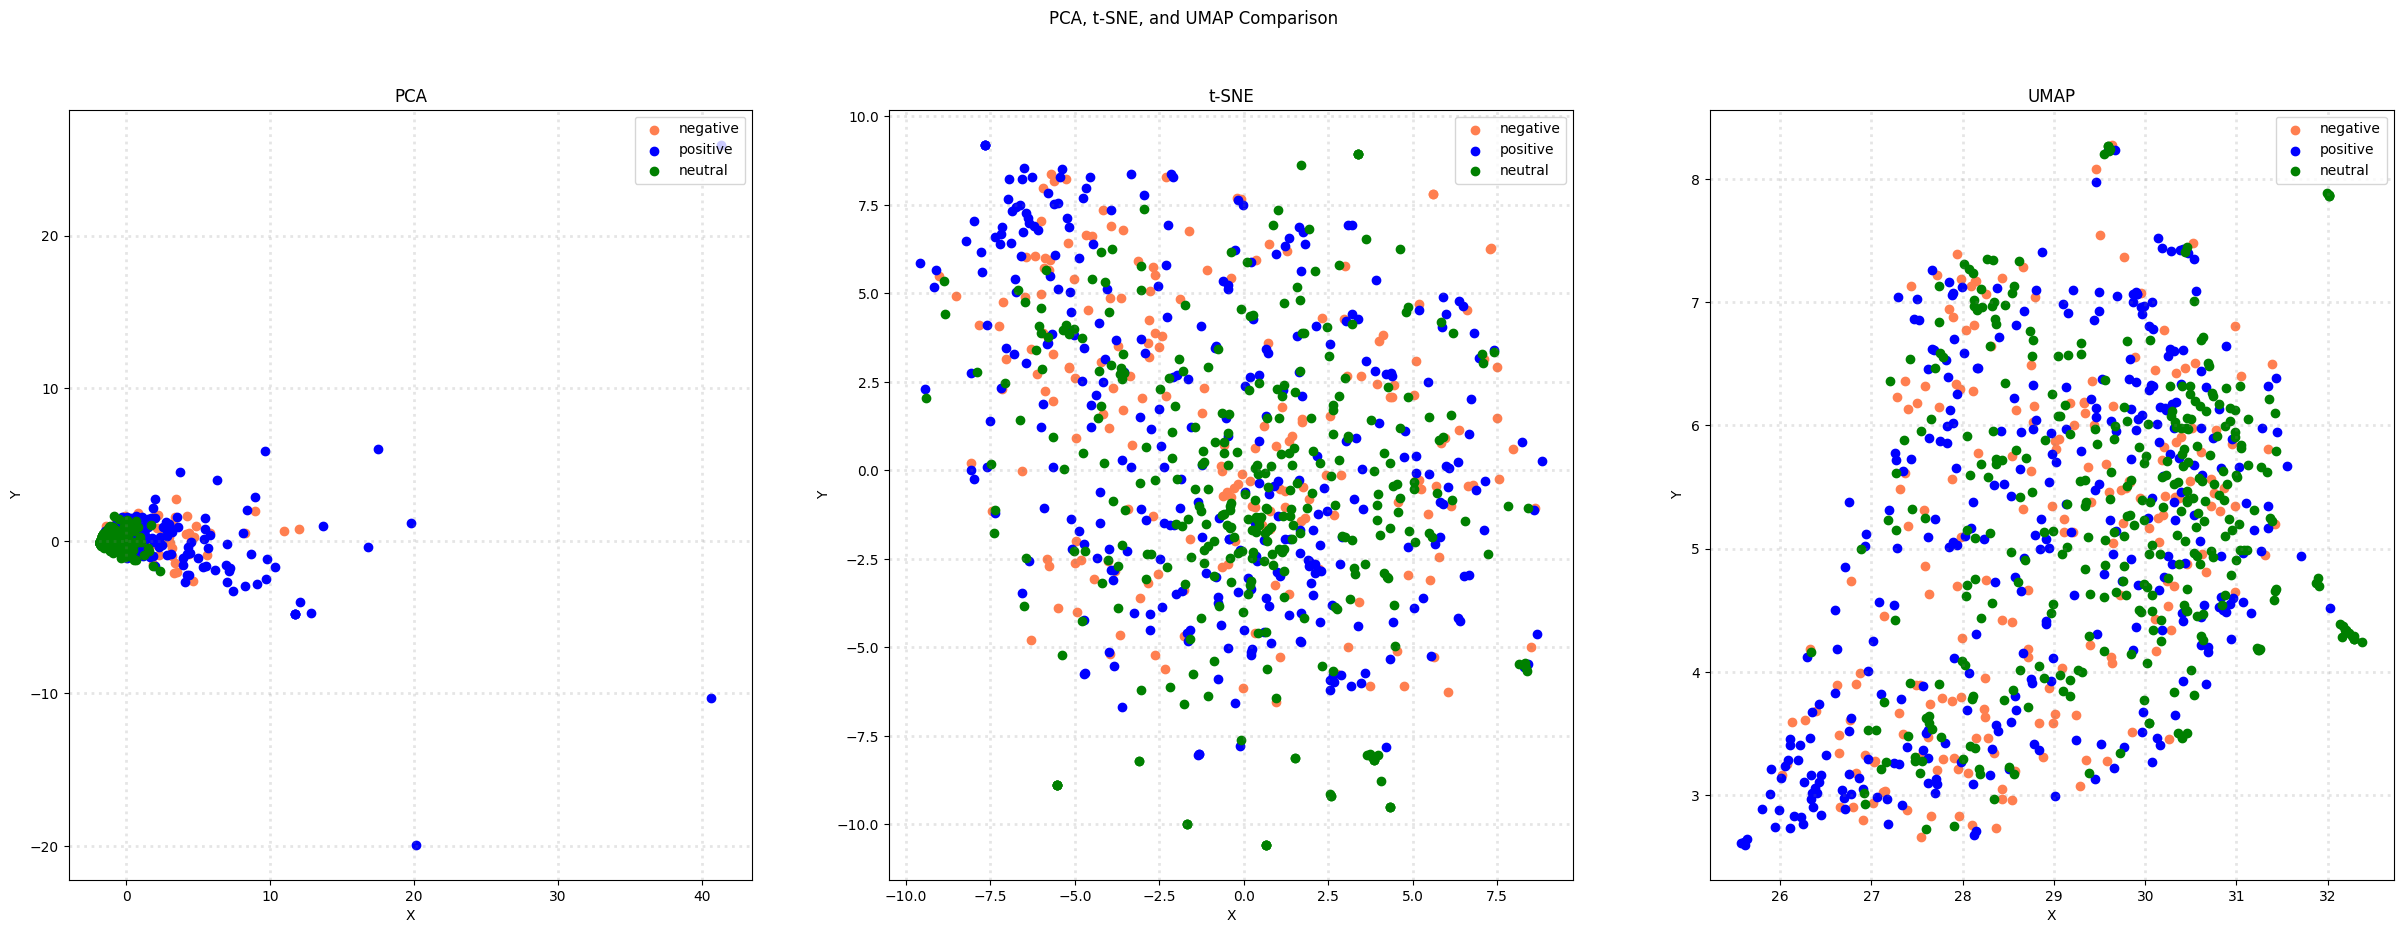

In [24]:
#Exercise 18
#Dimensionality Deduction

#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)
col = ['coral', 'blue', 'green']  
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment_label'] == category].T[0]
        ys = X_reduced[df['sentiment_label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

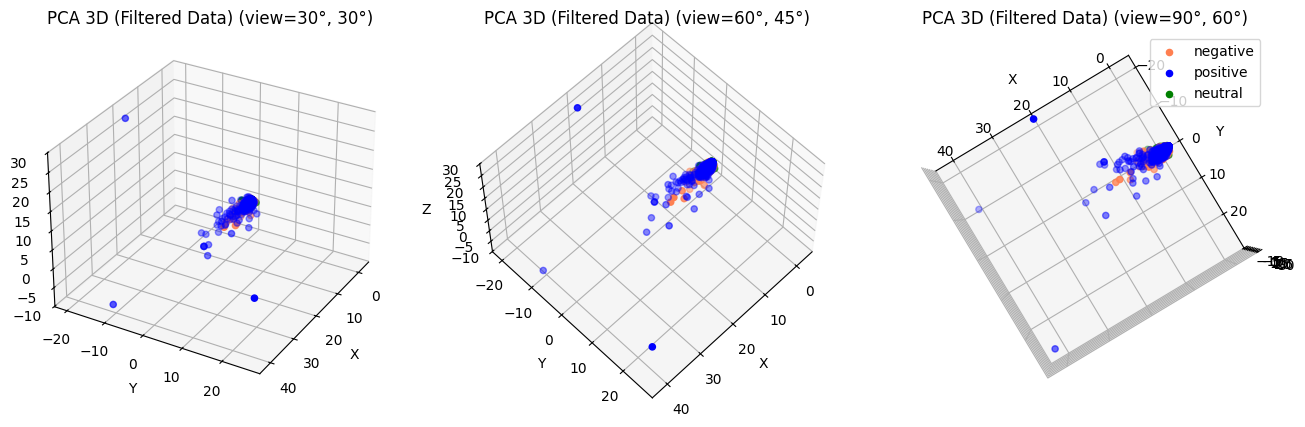

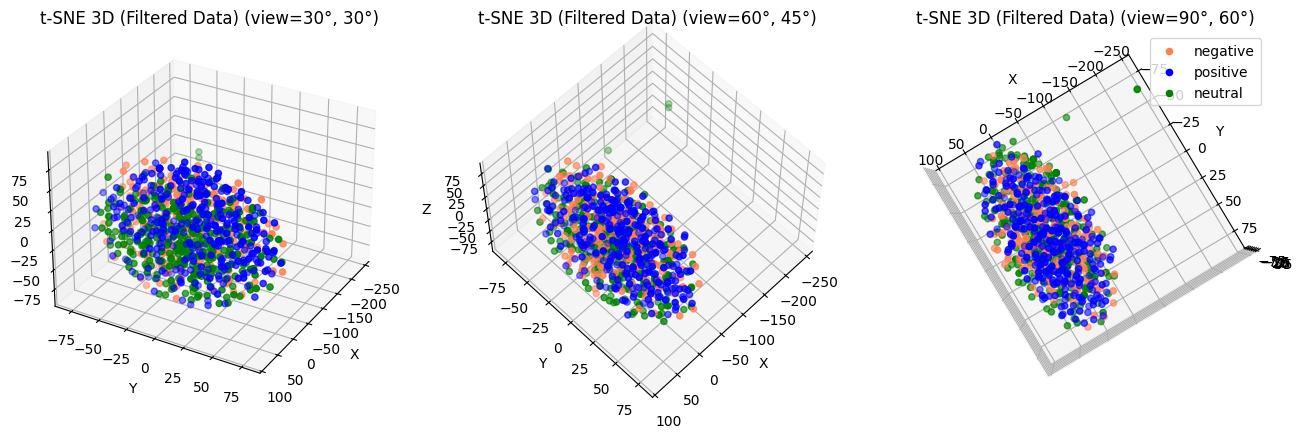

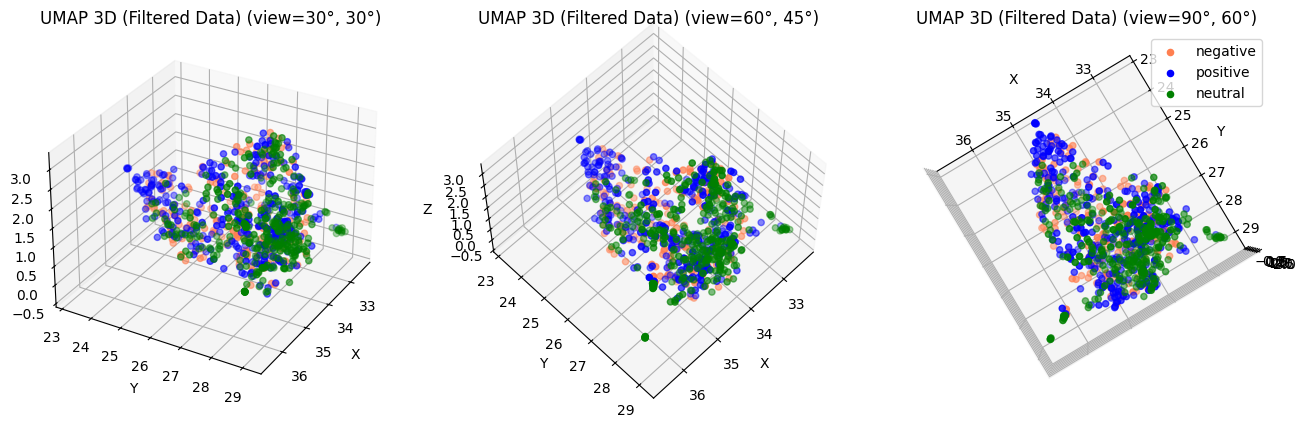

In [23]:
#Exercise 18
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt


X_pca_tdm_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'green']  
categories = df['sentiment_label'].unique()

def plot_3d(X_reduced, title):
    fig = plt.figure(figsize=(16, 6))
    angles = [(30, 30), (60, 45), (90, 60)]  # (elev, azim)
    for i, (elev, azim) in enumerate(angles, 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        for c, category in zip(col, categories):
            points = X_reduced[df['sentiment_label'] == category]
            ax.scatter(points[:, 0], points[:, 1], points[:, 2], color=c, label=category)
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f"{title} (view={elev}°, {azim}°)")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    plt.legend()
    plt.show()

plot_3d(X_pca_tdm_3d, 'PCA 3D (Filtered Data)')
plot_3d(X_tsne_tdm_3d, 't-SNE 3D (Filtered Data)')
plot_3d(X_umap_tdm_3d, 'UMAP 3D (Filtered Data)')

In [ ]:
#Exercise 19
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment_label)
df['bin_category'] = mlb.transform(df['sentiment_label']).tolist()
df[0:9]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_label,bin_category
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,negative,"[1, 0, 0]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,positive,"[0, 0, 1]"
2,comment,StockMarket,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,neutral,"[0, 1, 0]"
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,positive,"[0, 0, 1]"
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,neutral,"[0, 1, 0]"
5,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,positive,"[0, 0, 1]"
6,comment,stocks,Is the market in complete denial right now?,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,negative,"[1, 0, 0]"
7,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,positive,"[0, 0, 1]"
8,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,positive,"[0, 0, 1]"


In [ ]:
#Exercise 20
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[11]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[111]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[222]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['this sub has ruined emails for me, whenever I write “Best regards” I think of WSB']
['What dose the 100.027 mean ?']
['[/](/)\r\n\r\n&#x200B;\r\n\r\nsideways now, waiting for news']


In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.109109
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER5\AppData\Local\Temp\ipykernel_6548\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER5\AppData\Local\Temp\ipykernel_6548\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER5\AppData\Local\Temp\ipykernel_6548\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER5\AppData\Local\Temp\ipykernel_6548\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [ ]:
#Exercise 21 & 22
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment_label', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]


# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

target_names = [str(name) for name in target_names]
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.3077    0.3137    0.3107        51
         0.0     0.7400    0.3524    0.4774       105
         1.0     0.4902    0.7576    0.5952        99

    accuracy                         0.5020       255
   macro avg     0.5126    0.4746    0.4611       255
weighted avg     0.5566    0.5020    0.4898       255



In [ ]:
#task 3
# Task 3: Naive Bayes classification with frequency and TF-IDF features
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score

#1 Setup labels 
category_mapping = dict(df[['sentiment_label', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
target_names = [str(name) for name in target_names]

#2 Frequency-based features (Document-Term Matrix) ---
vectorizer = CountVectorizer()
X_freq = vectorizer.fit_transform(df['text'])

X_train_freq, X_test_freq, y_train, y_test = train_test_split(
    X_freq, df['sentiment'], test_size=0.3, random_state=42
)

#3 Train Multinomial Naive Bayes on frequency features
nb_freq = MultinomialNB()
nb_freq.fit(X_train_freq, y_train)
y_pred_freq = nb_freq.predict(X_test_freq)

print("  Document-Term Frequency Features  ")
print("Accuracy:", accuracy_score(y_test, y_pred_freq))
print("\nClassification Report:\n", classification_report(y_test, y_pred_freq, target_names=target_names, digits=4))

#4 TF-IDF features
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, df['sentiment'], test_size=0.3, random_state=42
)

#5 Train Complement Naive Bayes on TF-IDF features
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("\n  TF-IDF Features  ")
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

print("\nObservation:")
print("- Frequency-based NB works on raw counts, may favor frequent words.")
print("- TF-IDF-based NB downweights common words, often improves precision on important but less frequent words.")
print("- Using augmented features (frequent patterns) may further improve classification accuracy.")

  Document-Term Frequency Features  
Accuracy: 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.3077    0.3137    0.3107        51
         0.0     0.7347    0.3429    0.4675       105
         1.0     0.4935    0.7677    0.6008        99

    accuracy                         0.5020       255
   macro avg     0.5120    0.4748    0.4597       255
weighted avg     0.5557    0.5020    0.4879       255


  TF-IDF Features  
Accuracy: 0.4980392156862745

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.2679    0.2941    0.2804        51
         0.0     0.7250    0.2762    0.4000       105
         1.0     0.5220    0.8384    0.6434        99

    accuracy                         0.4980       255
   macro avg     0.5050    0.4696    0.4413       255
weighted avg     0.5548    0.4980    0.4706       255


Observation:
- Frequency-based NB works on raw counts, may favor freque

In [ ]:
#Exercise 21
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.6392156862745098

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.4167    0.3922    0.4040        51
         0.0     0.6639    0.7524    0.7054       105
         1.0     0.7273    0.6465    0.6845        99

    accuracy                         0.6392       255
   macro avg     0.6026    0.5970    0.5980       255
weighted avg     0.6390    0.6392    0.6370       255



#Decision Trees perform better here because they can capture word combinations and dependencies, unlike Naive #Bayes, which assumes words are independent. This makes Decision Trees better at separating positive, #neutral, and negative sentiments in text data.

In [ ]:
#Task 4 analyse inefficiency in data processing

#Inefficiencies noticed in preprocessing:

#1 NaN values in text: some rows are empty or missing text.

#2 Line breaks (\n) in text: can create unwanted tokens.

#3 No text cleaning: punctuation, numbers, and special characters may remain.

#4 No lowercase conversion: words with uppercase are treated differently.

#5 Stopwords not removed: common words add noise.

#6 No stemming or lemmatization: similar words are treated as different features.

#7 High-dimensional sparse matrix: too many zero values slow down training.